# Exercise 1 – Procedural vs Functional Programming

Given a list of numbers and words, find the count of each element type in the list.

Part 1

In [2]:
import random
import string

In [3]:
# This function will randomly generate a list of N numbers and words
def gen_rand(N):
    # randomly select the number of integers to be generated
    # this number is between 0 and N
    num_int = random.randint(0, N)
    num_word = N - num_int
    gen_list = [] # empty list to store numbers and words
    
    # letters to be used to form a string
    letters = "abcdefghijklmnopqrstuvwxyz"
    
    # randomly generate num_int number of integers and add them to the list
    for _ in range(num_int):
        gen_list.append(random.randint(-100, 100))
    
    # randomly generate num_word number of strings and add them to the list
    # length of each string is also random, between 1 to 26 characters
    for _ in range(num_word):
        gen_list.append(''.join([random.choice(letters) for _ in range(1,random.randint(1, 26))]))
    
    # make the elements in this list in a random order
    random.shuffle(gen_list)
    
    return gen_list
    

In [3]:
# test the output of gen_rand function
aList = gen_rand(10)
aList

['zj',
 'gimiidntcrrlwpkourfwcrnb',
 'vlvvciuqdtmptgispvtepqd',
 'qfcquwhhtwk',
 'zwhqmyhvipludezzds',
 'wdxmz',
 -67,
 'dysxyshapmyhyzvkuogvcgxrx',
 'evph',
 'tasbjhtzbdrevkdzpjnq']

Part 2

(a)

In [4]:
# this function will count each element type (number or word) in a list
def count_type(givenList):
    # two counters to document the number of numbers or words respectively
    word_count = 0
    number_count = 0
    
    # check the type of each element in the list
    for elm in givenList:
        if type(elm) == str:
            word_count += 1 # if the element is a string, then it is counted as a word
        elif type(elm) == int:
            number_count += 1 # if the element is an integer, then it is counted as a number
            
    # print the result to show how many numbers and words are in this list        
    print("Count of Numbers:", number_count)
    print("Count of Words:", word_count)
    

In [5]:
# test count_type function on aList created above
count_type(aList)
aList

Count of Numbers: 1
Count of Words: 9


['zj',
 'gimiidntcrrlwpkourfwcrnb',
 'vlvvciuqdtmptgispvtepqd',
 'qfcquwhhtwk',
 'zwhqmyhvipludezzds',
 'wdxmz',
 -67,
 'dysxyshapmyhyzvkuogvcgxrx',
 'evph',
 'tasbjhtzbdrevkdzpjnq']

(b)

In [5]:
# this function will count each element type (number or word) in a list
def count_elm_type(givenList):
    # total and print the number of integers and strings respectively
    print("Count of Numbers:", sum(type(elm) == int for elm in givenList))
    print("Count of Words:", sum(type(elm) == str for elm in givenList))

In [7]:
# test count_elm_type function on aList created above
count_elm_type(aList)

Count of Numbers: 1
Count of Words: 9


Part 3

In [6]:
import timeit
import matplotlib.pyplot as plt

In [7]:
# create a list with 100 elements
first_list = gen_rand(100)

# create a list with 1000 elements
second_list = gen_rand(1000)

# create a list with 10000 elements
third_list = gen_rand(10000)

# create a list with 100000 elements
fourth_list = gen_rand(100000)

# put four lists to be used later into an aggregated list
agg_list = [first_list, second_list, third_list, fourth_list]

In [8]:
# plot list sizes on the x-axis
x_value = [100, 1000, 10000, 100000]
# values on y-axis are times used to count words and numbers in these different sizes
# using two methods respectively
y_value_proced = [timeit.timeit(lambda: count_type(l), number=1) for l in agg_list]
y_value_func = [timeit.timeit(lambda: count_elm_type(l), number=1) for l in agg_list]

Count of Numbers: 53
Count of Words: 47
Count of Numbers: 844
Count of Words: 156
Count of Numbers: 3581
Count of Words: 6419
Count of Numbers: 13620
Count of Words: 86380
Count of Numbers: 53
Count of Words: 47
Count of Numbers: 844
Count of Words: 156
Count of Numbers: 3581
Count of Words: 6419
Count of Numbers: 13620
Count of Words: 86380


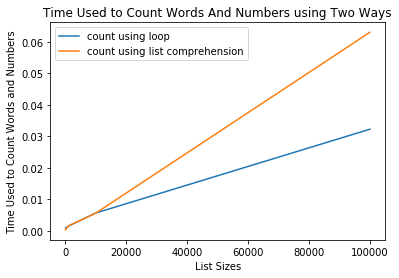

In [9]:
# plot time used for two different methods respectively through two lines
plt.plot(x_value, y_value_proced, label='count using loop')
plt.plot(x_value, y_value_func, label='count using list comprehension')
plt.legend()
plt.title('Time Used to Count Words And Numbers using Two Ways')
plt.xlabel('List Sizes')
plt.ylabel('Time Used to Count Words and Numbers')
plt.show() # display two lines plotted

# Exercise 2 – Simple Student Grading System - memory based

# Please see chunk with choice menu at the end.

In [11]:
import math
import matplotlib.pyplot as plt

Load the data set from exams.csv file (file is comma delimited)

In [12]:
# load the data
def load_data():
    file_name = 'exams.csv'
    with open(file_name, 'r') as f:
        # read line by line and delete the white space in each line
        data = f.read().splitlines()
    # for each student, create a dictionary using keys id, Name, Quizzes, Projects
    # store all dictionaries in a list called students
    students = []
    for elm in data:
        line = elm.split(',')
        if line[0] != 'id':
            # skip the first line in data file since it only contains column names
            # assign keys of a dictionary based on column names
            dic = {"id":line[0], "Name":line[1], "Quizzes":line[2], "Projects":line[3], 
                   "Exams":line[4]}
            students.append(dic)
    return students

Print a list of student names, final scores, and letter grades sorted by names

In [13]:
def name_score_grade_sorted():
    # load the data first, in order to execute this function
    file_name = 'exams.csv'
    with open(file_name, 'r') as f:
        # read line by line and delete the white space in each line
        data = f.read().splitlines()
    # for each student, create a dictionary using keys id, Name, Quizzes, Projects
    # store all dictionaries in a list called students
    students = []
    for elm in data:
        line = elm.split(',')
        if line[0] != 'id':
            # skip the first line in data file since it only contains column names
            # assign keys of a dictionary based on column names
            dic = {"id":line[0], "Name":line[1], "Quizzes":line[2], "Projects":line[3], 
                   "Exams":line[4]}
            students.append(dic)
            
    # sorted list of student names
    # exclude first line in data file since it only contains column names
    names = [elm.split(',')[1] for elm in data if (elm.split(',')[0] != 'id')]
    names = sorted(names) # sort names alphabetically

    # this function calculates the final score of a student, based on:
    # Exams Score (40% of the final grade), Projects Score (30% of the final grade),
    # and Quizzes Score (30% of the final grade)
    def calc_final_score(student):
        quiz = int(student["Quizzes"]) # to do addtion and multiplication, cast str into int
        project = int(student["Projects"])
        exam = int(student["Exams"])
        return (quiz*0.3 + project*0.3 + exam*0.4)

    # this is a function to assign a student's letter grade based on his final score
    def assign_letter_grade(score):
        # score in the range of [90-100] get assigned a A
        if score >= 90 and score <= 100:
            return "A"
        # score in the range of [80-90) get assigned a B
        elif score >= 80 and score < 90:
            return "B"
        # score in the range of [20-80) get assigned a C
        elif score >= 20 and score < 80:
            return "C"
        # score in the range of [10-20) get assigned a D
        elif score >= 10 and score < 20:
            return "D"
        # score in the range of [0-10) get assigned a F
        else:
            return "F"

    # to print a list of names, final score, letter grade alphabetically
    for name in names:
        for student in students:
            if name == student["Name"]:
                print("************************************************************")
                # display a student's name
                print("Student Name:", student["Name"])
                # display a student's final score
                print("Final score of {} is : {} ".format(student["Name"], 
                                                          calc_final_score(student)))
                # display a student's letter grade calculated based on his final score
                print("Letter Grade of %s is : %s" %(student["Name"],
                                                     assign_letter_grade(calc_final_score(student))))

Print score summary (student count, Min, Max, mean, mode, and standard deviation)

In [14]:
def score_summary():
    # load the data first, in order to execute this function
    students = load_data()
    
    # this function calculates the final score of a student, based on:
    # Exams Score (40% of the final grade), Projects Score (30% of the final grade),
    # and Quizzes Score (30% of the final grade)
    def calc_final_score(student):
        quiz = int(student["Quizzes"]) # to do addtion and multiplication, cast str into int
        project = int(student["Projects"])
        exam = int(student["Exams"])
        return (quiz*0.3 + project*0.3 + exam*0.4)
    
    # lists to record final scores of all students
    finalScore = [calc_final_score(student) for student in students]

    # calculate and display the total number of students in the class
    print("In this class, the number of students is:", len(students))
    print()

    # calculate and display the min final score of students in the class
    print("In this class, the minimum final score of students is:", min(finalScore))
    print()

    # calculate and display the max final score of students in the class
    print("In this class, the maximum final score of students is:", max(finalScore))
    print()

    # calculate and display the average final score of students in the class
    print("In this class, the mean final score of students is:",
          sum(finalScore) / float(len(students)))
    print()

    # this function returns a list of modes given a list of score numbers
    # it is possible that several scores appear the same number of times
    def mode_list(score_list):
        # keep unique score numbers in a set
        scoreSet = set(score_list)
        # keep track of how many times each score appears in the given list
        countList = [score_list.count(score) for score in scoreSet]
        # store scores that appear the most number of times
        modeList = [score for score in scoreSet if score_list.count(score) == max(countList)]
        return modeList

    # calculate and display the mode of final score of students in the class
    if len(mode_list(finalScore)) != 1:
        print("In this class, there is no unique mode")
    print("The modes of final score of students are:", mode_list(finalScore))
    print()

    # this function calculates the standard deviation of a given list of numbers
    def find_sd(givenList):
        num = len(givenList)
        average = sum(givenList) / float(num) # find the mean of the list
        # find difference between each number and mean
        diff = [elm - average for elm in givenList]
        diff_sqr = [d ** 2 for d in diff]
        sum_diff_sqr = sum(diff_sqr) # sum all squared difference, following std formula
        variance = sum_diff_sqr / num
        return math.sqrt(variance) # standard deviation is square root of variance

    # calculate and display the standard deviation of final score of students in the class
    print("In this class, the standard deviation of final score of students is:",
          find_sd(finalScore))

Identify values that are larger than the mean and two times standard deviation

In [15]:
def larger_than_two_sd():
    # load the data first, in order to execute this function
    students = load_data()
    
    # this function calculates the final score of a student, based on:
    # Exams Score (40% of the final grade), Projects Score (30% of the final grade),
    # and Quizzes Score (30% of the final grade)
    def calc_final_score(student):
        quiz = int(student["Quizzes"]) # to do addtion and multiplication, cast str into int
        project = int(student["Projects"])
        exam = int(student["Exams"])
        return (quiz*0.3 + project*0.3 + exam*0.4)
    
    # this function calculates the standard deviation of a given list of numbers
    def find_sd(givenList):
        num = len(givenList)
        average = sum(givenList) / float(num) # find the mean of the list
        # find difference between each number and mean
        diff = [elm - average for elm in givenList]
        diff_sqr = [d ** 2 for d in diff]
        sum_diff_sqr = sum(diff_sqr) # sum all squared difference, following std formula
        variance = sum_diff_sqr / num
        return math.sqrt(variance) # standard deviation is square root of variance
    
    # lists to record final scores of all students
    finalScore = [calc_final_score(student) for student in students]
    
    # calculate the average final score
    mean = sum(finalScore) / float(len(students))
    # calculate the standard deviation of final score
    sd = find_sd(finalScore)
    # this list stores values that are two times standard deviation larger than mean
    two_sd_away = [score for score in finalScore if score > (mean + sd*2)]
    for student in students:
        if calc_final_score(student) in two_sd_away:
            print(student["Name"], calc_final_score(student))

Plot a pie chart showing the final letter grades distribution.

In [16]:
def pie_chart():
    # load the data first, in order to execute this function
    students = load_data()
    
    # this is a function to assign a student's letter grade based on his final score
    def assign_letter_grade(score):
        # score in the range of [90-100] get assigned a A
        if score >= 90 and score <= 100:
            return "A"
        # score in the range of [80-90) get assigned a B
        elif score >= 80 and score < 90:
            return "B"
        # score in the range of [20-80) get assigned a C
        elif score >= 20 and score < 80:
            return "C"
        # score in the range of [10-20) get assigned a D
        elif score >= 10 and score < 20:
            return "D"
        # score in the range of [0-10) get assigned a F
        else:
            return "F"    
    
    # this function calculates the final score of a student, based on:
    # Exams Score (40% of the final grade), Projects Score (30% of the final grade),
    # and Quizzes Score (30% of the final grade)
    def calc_final_score(student):
        quiz = int(student["Quizzes"]) # to do addtion and multiplication, cast str into int
        project = int(student["Projects"])
        exam = int(student["Exams"])
        return (quiz*0.3 + project*0.3 + exam*0.4)   
    
    # lists to record letter grades of all students
    letterGrade = [assign_letter_grade(calc_final_score(student)) for student in students]

    grades = ['A', 'B', 'C', 'D', 'F'] # list of possible letter grades a student receives
    labels = 'A', 'B', 'C', 'D', 'F'
    # calculate and store the percentage of student receiving each letter grade
    sizes = [letterGrade.count(grade)/100.0 for grade in grades]
    explode = (0, 0, 0, 0, 0)
    # different colors to distinguish each letter grade
    colors = ['red', 'pink', 'yellow', 'blue', 'green']

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal') # equal aspect ratio ensures that pie is drawn as a circle.
    plt.show() # display the pie chart plotted

Create box plots parameters (not drawing them but just computing the numbers [min, max, median, Q1, Q3] for a box plot)

In [17]:
def box_plot_param():
    # load the data first, in order to execute this function
    students = load_data()
    
    # this function calculates the final score of a student, based on:
    # Exams Score (40% of the final grade), Projects Score (30% of the final grade),
    # and Quizzes Score (30% of the final grade)
    def calc_final_score(student):
        quiz = int(student["Quizzes"]) # to do addtion and multiplication, cast str into int
        project = int(student["Projects"])
        exam = int(student["Exams"])
        return (quiz*0.3 + project*0.3 + exam*0.4)
    
    # lists to record final scores of all students
    finalScore = [calc_final_score(student) for student in students]
    
    sorted_score = sorted(finalScore)
    print("min of final scores in this class is:", min(finalScore))
    print("max of final scores in this class is:", max(finalScore))
    print("median of final scores in this class is:",
          (sorted_score[49]+sorted_score[50]) / 2)
    print("first quartile (Q1) of final scores is:",
          (sorted_score[24]+sorted_score[25]) / 2)
    print("third quartile (Q3) of final scores is:",
          (sorted_score[74]+sorted_score[75]) / 2)

# Choice Menu

Welcome! The following are options you can choose:
1    Load the data set from exams.csv file (file is comma delimited).
2    Print a list of student names, final scores, and letter grades sorted by names.
3    Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)
4    Identify values that are larger than the mean and two times standard deviation
5    Plot a pie chart showing the final letter grades distribution.
6    Create box plots parameters [min, max, medial, Q1, Q3] for a box plot.
7    EXIT the system.
Please enter your choice:5


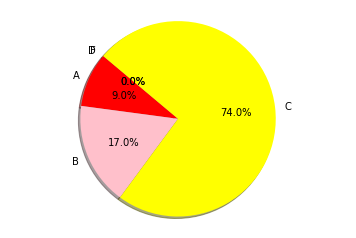

****************************************************************************
Welcome! The following are options you can choose:
1    Load the data set from exams.csv file (file is comma delimited).
2    Print a list of student names, final scores, and letter grades sorted by names.
3    Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)
4    Identify values that are larger than the mean and two times standard deviation
5    Plot a pie chart showing the final letter grades distribution.
6    Create box plots parameters [min, max, medial, Q1, Q3] for a box plot.
7    EXIT the system.
Please enter your choice:6
min of final scores in this class is: 31.799999999999997
max of final scores in this class is: 99.7
median of final scores in this class is: 68.65
first quartile (Q1) of final scores is: 60.25
third quartile (Q3) of final scores is: 80.30000000000001
****************************************************************************
Welcome! The following ar

Please enter your choice:1
[{'id': 'ID1', 'Name': 'James', 'Quizzes': '43', 'Projects': '51', 'Exams': '55'}, {'id': 'ID2', 'Name': 'Josephine', 'Quizzes': '76', 'Projects': '84', 'Exams': '87'}, {'id': 'ID3', 'Name': 'Art', 'Quizzes': '89', 'Projects': '94', 'Exams': '92'}, {'id': 'ID4', 'Name': 'Lenna', 'Quizzes': '70', 'Projects': '67', 'Exams': '64'}, {'id': 'ID5', 'Name': 'Donette', 'Quizzes': '63', 'Projects': '59', 'Exams': '58'}, {'id': 'ID6', 'Name': 'Simona', 'Quizzes': '65', 'Projects': '69', 'Exams': '68'}, {'id': 'ID7', 'Name': 'Mitsue', 'Quizzes': '41', 'Projects': '43', 'Exams': '34'}, {'id': 'ID8', 'Name': 'Leota', 'Quizzes': '63', 'Projects': '72', 'Exams': '70'}, {'id': 'ID9', 'Name': 'Sage', 'Quizzes': '56', 'Projects': '71', 'Exams': '65'}, {'id': 'ID10', 'Name': 'Kris', 'Quizzes': '60', 'Projects': '66', 'Exams': '65'}, {'id': 'ID11', 'Name': 'Minna', 'Quizzes': '41', 'Projects': '49', 'Exams': '43'}, {'id': 'ID12', 'Name': 'Abel', 'Quizzes': '53', 'Projects': '54'

Please enter your choice:7
Goodbye!


In [18]:
def choice_menu():
    print("Welcome! The following are options you can choose:")
    print("1    Load the data set from exams.csv file (file is comma delimited).")
    print("2    Print a list of student names, final scores, and letter grades sorted by names.")
    print("3    Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)")
    print("4    Identify values that are larger than the mean and two times standard deviation")
    print("5    Plot a pie chart showing the final letter grades distribution.")
    print("6    Create box plots parameters [min, max, medial, Q1, Q3] for a box plot.")
    print("7    EXIT the system.")

choice_menu() # display all possible choices a user could choose
user_choice = input("Please enter your choice:")

# the user will be asked to enter a new choice if he chooses an invalid option
if user_choice not in ['1', '2', '3', '4', '5', '6', '7']:
    print("Your choice is invalid! Please choose one from options above!")
    user_choice = input("Please enter your choice:")

# the program will display different results according to the choice number the user enters
# it will keep asking the user to input a choice until the user chooses to exit the program
while user_choice != '7':
    if user_choice == '1':
        students = load_data()
        print(students) # display the list containing dictionaries for all students
        # to indicate that below is a new user choice
        print("****************************************************************************")
        # let the user make a new choice
        choice_menu()
        user_choice = input("Please enter your choice:")
        
    elif user_choice == '2':
        name_score_grade_sorted()
        print("****************************************************************************")
        choice_menu()
        user_choice = input("Please enter your choice:")
        
    elif user_choice == '3':
        score_summary()
        print("****************************************************************************")
        choice_menu()
        user_choice = input("Please enter your choice:")
        
    elif user_choice == '4':
        larger_than_two_sd()
        print("****************************************************************************")
        choice_menu()
        user_choice = input("Please enter your choice:")
        
    elif user_choice == '5':
        pie_chart()
        print("****************************************************************************")
        choice_menu()
        user_choice = input("Please enter your choice:")
        
    elif user_choice == '6':
        box_plot_param()
        print("****************************************************************************")
        choice_menu()
        user_choice = input("Please enter your choice:")

# exit the program only if the user enters 7
if user_choice == '7':
    print("Goodbye!")

# Exercise 3

Pick an extension library from PyPI or other sources (something of interest to you). Summarize
the functionality provided by the library (one paragraph) and show a usage example.

a) summarize the functionality

library name: aiogoogletrans

This is a library based on a language translation library named googletrans, with asyncio support. It is compatible with Python 3.6+. Features of this library include asyncio (to write concurrent code using the async/await syntax), auto-language detection, translating a list of words or sentences, and using another google translate domain for translation. This library uses the same servers that translate.google.com uses, so it performs translations reliably. Like google translator, by inputting source and destination language abbreviations, we are able to translate a word or a sentence. Not only the final translated result will be displayed, this library also displays source and destination languages, confidence of translation, and how to pronunce the final text. It can also work as a command line application.

Some examples of language codes are: 'Italian' = 'it', 'Japanese' = 'ja', 
'Chinese Simplified' = 'zh-CN', 'Latin' = 'la', following language codes of google translator.

b) usage example

FIRST, in Terminal (for mac), run the following to install the library:
pip install aiogoogletrans

In [19]:
# SECOND, import aiogoogletrans and asyncio
from aiogoogletrans import Translator
import asyncio

In [20]:
# THIRD, initialize a translator to perform translations later
translator = Translator()

# Event loops run asynchronous tasks
# FOURTH, get the current event loop
loop = asyncio.get_event_loop()

# run until the translation finishes and display the result
# translate is a method for translator to translate a desired string choice
# in this example, we want to translate hola (Spanish)
# when no source language is specified, the translator auto-detects the language type
# when no destination language is specified, it is automatically translated into English
print(loop.run_until_complete(translator.translate('hola')))

# in this example, we want to translate Sorry (English) to Chinese Simplified
print(loop.run_until_complete(translator.translate('Sorry', dest='zh-CN')))

# in this example, we want to translate a sentence in Latin
# since no destination language is specified, it will be translated into English
print(loop.run_until_complete(translator.translate('veritas lux mea', src='la')))

Translated(src=es, confidence=0.91015625, dest=en, text=Hello, pronunciation=Hello)
Translated(src=en, confidence=0.9296875, dest=zh-cn, text=抱歉, pronunciation=Bàoqiàn)
Translated(src=la, confidence=1, dest=en, text=The truth is my light, pronunciation=The truth is my light)
